## Mr. Prince Kumar 
Student of Data Scientist

## Linear Regression

## What is Linear regression

Linear Regression is machine learning Algorithm based on supervised learning.It performs the regression task.
it is mostly finding out the relationship between variables and forecasting

Linear Regression shows the linear relationship between independent variable and dependent variable .
Hence it is called Linear Regression.

it is one of the very simple and easy algorithm which works on regression and shows the relationship between continious variable.

## Condition of Linear Regression

1. Independent Variabe and Dependent Shoul be Highly co-related to each other
2. If feature will increase than labels will automatically increase
 if feature will decrease than lables will also decrease.
3. All features shoul not be co-related to each other.

## Residual

The distance between the Actual value and predicted value is called Residual

Residual=Actual value - predicted value

## Assumption for Linear Regression

* The relationship between dependent and independent variable should be linear which means they are highly co-related
to each other

* The mean value of the residual should be zero (0)
* The error term should not highly co-related to each other
* The distance of my error point to the regression line minimum (or) constant variation.
    it is called Homoscedasticity
* No multi co-linearity

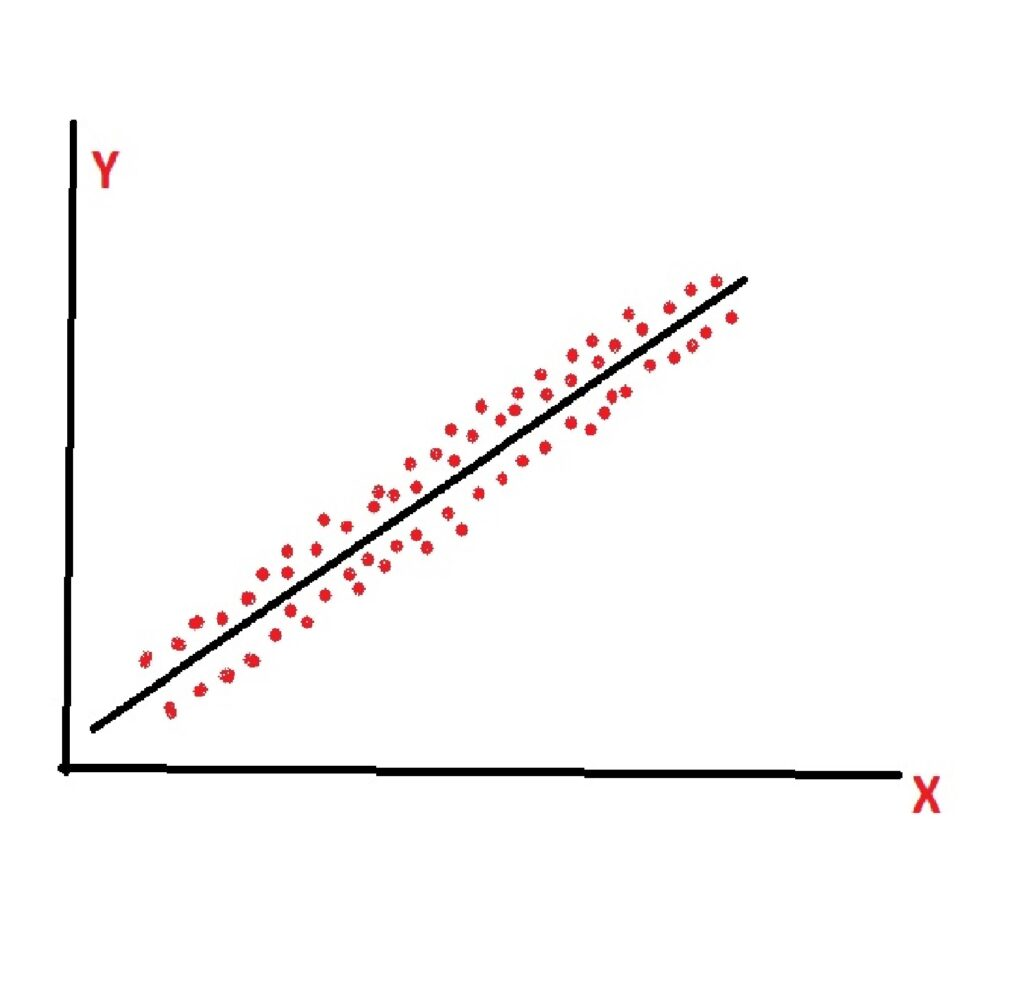

## importing the usefull library

In [63]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as st
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LassoCV

In [64]:
df=pd.read_csv("C:/Users/Prince kumar/OneDrive/Desktop/mldataset/Linear Regression - Sheet1.csv")
df.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


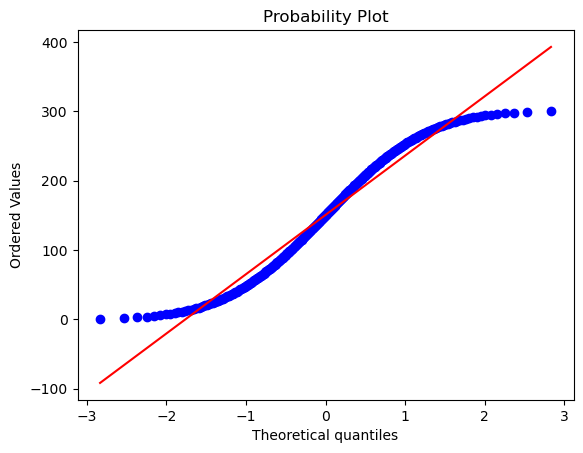

In [65]:
#plt.figure(figsize=(10,8))
st.probplot(df["X"],dist="norm",plot=pylab)
pylab.show()

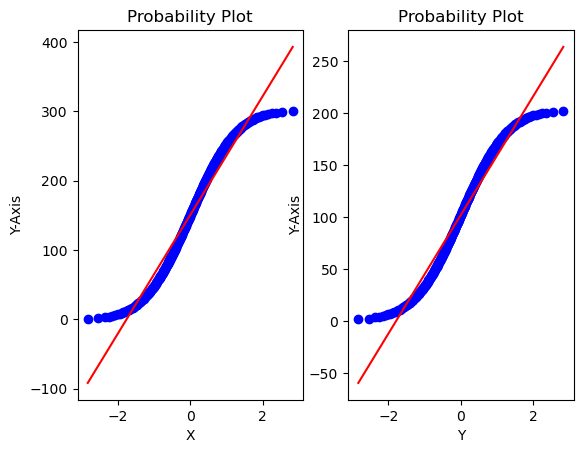

In [66]:
a=1
for i in df:
    plt.subplot(1,2,a)
    st.probplot(df[i],dist="norm",plot=pylab)
    plt.xlabel(i)
    plt.ylabel("Y-Axis")
    df[i].skew()
    a+=1

 ## Cor-relationVisulizing with Heatmap

In [67]:
df.corr()

,X,Y
X,1.000000,0.959876
Y,0.959876,1.000000


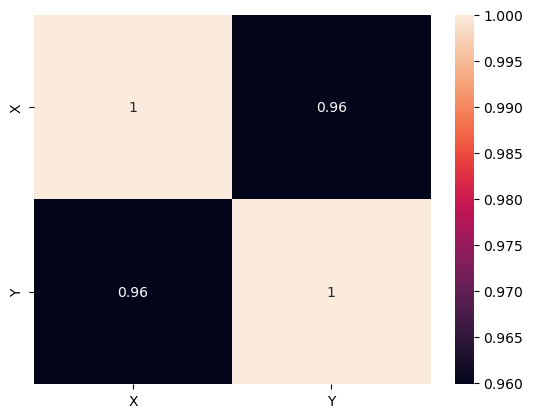

In [68]:
sns.heatmap(df.corr(),annot=True);

It is Highly corelated to each other


In [69]:
x=df[["X"]]
y=df[["Y"]]

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [71]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [72]:
pred=lr.predict(x_test)
pred_=lr.predict(x_train)

## R2_Score

Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model

In [73]:
ac=r2_score(y_test,pred)
ac2=r2_score(y_train,pred_)

In [74]:
print("Accuracy of the training data :- ",ac2)
print("\nAccuracy of the testing data :- ",ac)

Accuracy of the training data :-  0.9507484241241835

Accuracy of the testing data :-  0.7985647513515579


## Mean Squared Error  (MSE)

Caluculating mean square error

In [75]:
mean_squared_error(y_test,pred)

656.1609236360772

In [76]:
lr.coef_

array([[0.65023172]])

In [77]:
lr.intercept_

array([4.86580154])

## Actual vs Predicted in scatterplot

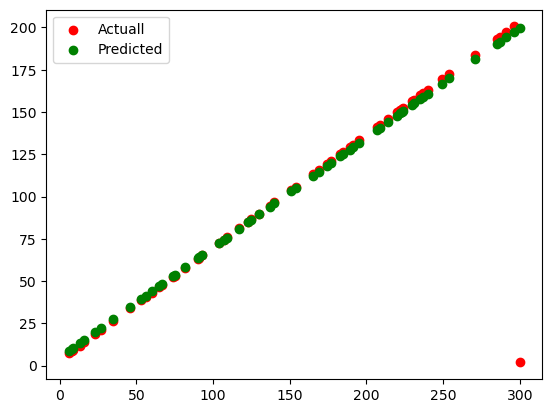

In [78]:
plt.scatter(x_test,y_test,label="Actuall",c="red")
plt.scatter(x_test,pred,label="Predicted",c="green")
df["X"].skew()
plt.legend()
plt.show()

## Hypertuning in this model to balance the overfitting

##  LassoCV

In [79]:
lcv=LassoCV(cv=10,max_iter=10000,alphas=None,normalize=True)
lcv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [80]:
alpha=lcv.alpha_

In [81]:
alpha

0.003643497788220021

In [82]:
from sklearn.linear_model import Lasso

In [83]:
ls=Lasso(alpha=alpha)

In [84]:
ls.fit(x_train,y_train)

Lasso(alpha=0.003643497788220021)

In [85]:
ls.score(x_test,y_test)

0.7985648644676654

In [86]:
ls.score(x_train,y_train)

0.9507484241236578

In [87]:
ls.intercept_

array([4.86587449])

In [88]:
ls.coef_

array([0.65023124])

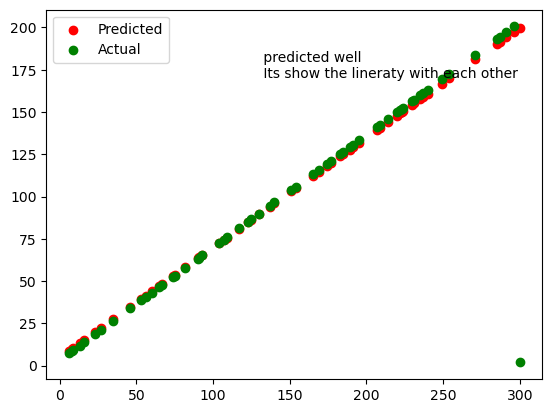

In [89]:
plt.scatter(x_test,ls.predict(x_test),color="red",label="Predicted")
plt.scatter(x_test,y_test,color="green",label="Actual")
plt.legend()
plt.text(130,170," predicted well\n Its show the lineraty with each other")
plt.show()

### I have Completed Simple Linear Regreesion

#### Best Regards_